[]


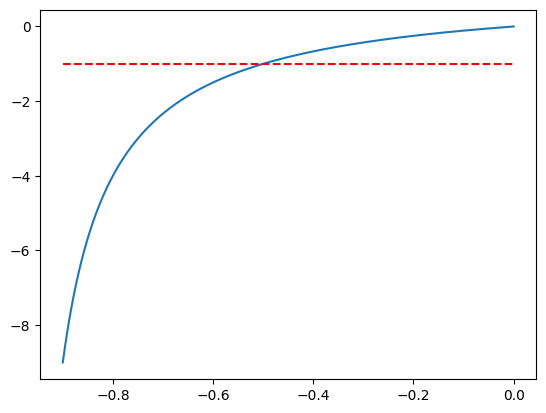

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3,-2,1000)
xpos = np.linspace(-0.9, 0, 1000)
def f(a):
    return a/(1+a)
#plt.plot(x, [f(i) for i in x])
plt.plot(xpos,[f(i) for i in xpos])
plt.plot(xpos,(-1)*np.ones(len(xpos)),"r--")
intersect = np.intersect1d(xpos, (-0.1)*np.ones(len(xpos)))
print(intersect)
#plt.plot(intersect[0], intersect[1], "go")

In [96]:
from scipy.optimize import fsolve

def a_gamma(x, g):
    return x**3 + x - g

def eigenvalues_n2(gamma):
    a = fsolve(a_gamma,1, args=(gamma,))
    enum = 4
    denom = (1+a[0]**2)**2
    if denom<enum:
        complex_part = np.sqrt(enum/denom - 1)
        real_part = -2
    else:
        complex_part = 0
        real_part = -2 + np.sqrt(1 - enum/denom)
    return [real_part, complex_part]

list_gamma = np.linspace(-5,5,1000)
list_eigenvals = np.array([eigenvalues_n2(g) for g in list_gamma])

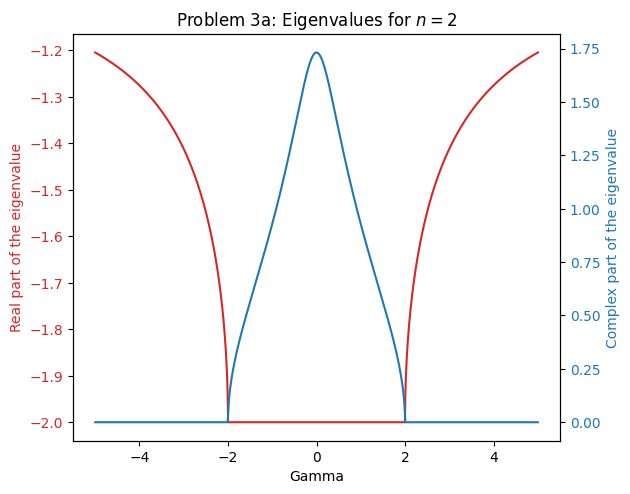

In [97]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Gamma')
ax1.set_ylabel("Real part of the eigenvalue", color=color)
ax1.plot(list_gamma, list_eigenvals[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Complex part of the eigenvalue', color=color)  # we already handled the x-label with ax1
ax2.plot(list_gamma, list_eigenvals[:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Problem 3a: Eigenvalues for $n=2$")
plt.show()

Discussion: At $\gamma = \pm 2$, the eigenvalues change from real to complex. While they are attractive nodes for $|\gamma|>2$, they become attractive spirals for $|\gamma|<2$. They can still be considered stable, because trajectories starting close to the fixed point will approach them in both cases.

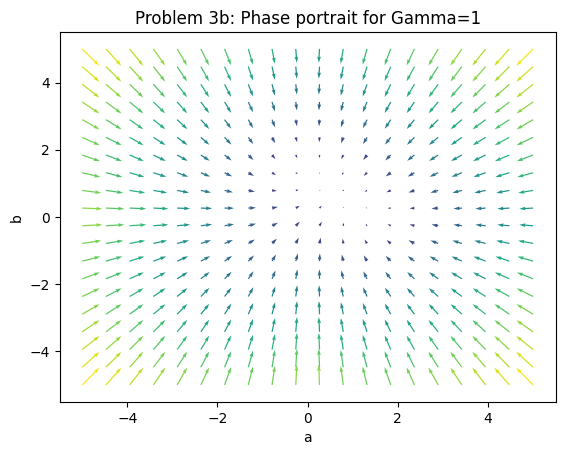

In [138]:
def genetic_switches(a,b, gamma):
    d_a = (gamma/(1+b*b))-a
    d_b = (gamma/(1+a*a))-b
    return d_a, d_b

def plot_phase_portrait(gamma):
    num_vectors = 20
    a,b = np.meshgrid(np.linspace(-5,5,num_vectors), np.linspace(-5,5,num_vectors))
    u = genetic_switches(a, b, gamma)[0]
    v = genetic_switches(a,b, gamma)[1]
    
    plt.quiver(a,b,u,v,np.hypot(u, v), width = 0.0025)
    plt.plot()
    plt.xlabel("a")
    plt.ylabel("b")
    plt.title(f"Problem 3b: Phase portrait for Gamma={gamma}")
plot_plohase_portrait(1)

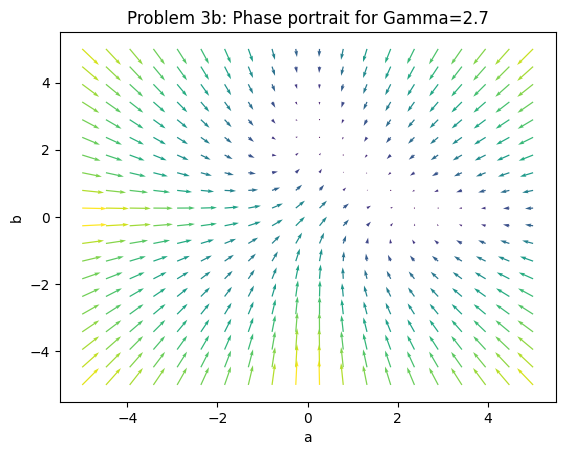

In [139]:
plot_phase_portrait(2.7)

In [ ]:
b=1
a=2
h = 3*b*(b+1)/a
x1_min = 1/(2*(b+1))

def x2(x1):
    return h+2-x1

x1 = np.linspace(x1_min, h+2, 1000)
list_x2 = [x2(i) for i in x1]

plt.plot([x1_min for _ in x1], list_x2)
plt.plot(x1, np.zeros(len(list_x2)))
plt.plot(x1, list_x2, "green")